# Descrição do projeto:
Você trabalha para a loja online Ice, que vende videogames no mundo todo. As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas. Você precisa identificar padrões que determinam se um jogo tem sucesso ou não. Isso vai permitir que você identifique possíveis sucessos e planeje campanhas publicitárias.

O conjunto de dados contém uma coluna de "rating" (classificação) que armazena a classificação ESRB de cada jogo. O Entertainment Software Rating Board avalia o conteúdo de um jogo e atribui uma classificação etária, como Teen (Adolescente) ou Mature (Adulto).

## Dicionário de dados

Abaixo está um dicionário que lista as colunas da tabela e indica os dados contidos nelas:

- `'Name'`: nome

- `'Platform'`: plataforma

- `'Year_of_Release'`: Ano de lançamento

- `'Genre'`: gênero

- `'NA_sales'`: vendas norte-americanas em milhões de USD

- `'EU_sales'`: vendas na Europa em milhões de USD

- `'JP_sales'`: vendas no Japão em milhões de USD

- `'Other_sales'`: vendas em outros países em em milhões de USD

- `'Critic_Score'`: Pontuação crítica (máximo de 100)

- `'User_Score'`: Pontuação do usuário (máximo de 10)

- `'Rating'`: ESRB

## Carregando as bibliotecas

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns

## Carregando os arquivos de dados e estudando informações gerais

In [2]:
df_games = pd.read_csv('games.csv')

In [3]:
#amostra inicial dos dados

df_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#estudo inicial dos dados

df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Preparando os dados

In [5]:
#renomeando as colunas para letras minúsculas, seguindo snake_case

new_columns = {col: col.lower() for col in df_games.columns}
df_games = df_games.rename(columns=new_columns)

In [7]:
#mudando tbd para NaN, para avaliar a quantidade real de dados faltantes na coluna user_score

df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)

In [8]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
#convertendo os dados de user_score de object para float, uma vez que representa uma pontuação

df_games['user_score'] = df_games['user_score'].astype(float)

In [10]:
#removerei os dados faltantes em name e genre, considerando a quantidade (dois)

df_games.dropna(subset=['name', 'genre'], inplace=True)

In [12]:
#substituirei os dados faltantes em rating por 'desconhecido', para evitar a exclusão dos mesmos e por serem valores categóricos

df_games['rating'] = df_games['rating'].fillna('desconhecido')

Possíveis razões para presença de valores ausentes:

- falha na coleta de dados, por erro técnico ou humano
- preferência do usuário de não fornecer algumas informações
- informações não disponíveis para registro

In [13]:
#calculando o total de vendas para cada jogo e adicionando nova columa ao DataFrame

df_games['total_sales'] = df_games['na_sales'] +  df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

In [14]:
#conferindo o DataFrame

df_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,desconhecido,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,desconhecido,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,desconhecido,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,desconhecido,28.31


## Analisando os dados

In [15]:
#contando quantos jogos foram lançados em anos diferentes

games_per_year = df_games.groupby('year_of_release')['name'].count()

In [16]:
print(games_per_year)

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64


Os lançamentos começaram a aumentar significativamente à partir de 1994 e mais ainda em 2007. Depois, sofreram uma queda à partir de 2012.

In [17]:
#calculando as vendas para cada plataforma

total_sales_per_platform = df_games.groupby('platform')['total_sales'].sum()

In [18]:
print(total_sales_per_platform.sort_values(ascending=False))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


In [19]:
#calculando o ciclo de vida médio das plataformas

platform_lifecycle = df_games.groupby('platform').agg({'year_of_release': ['min', 'max']})

#diferença entre o ano do primeiro e último lançamentos
platform_lifecycle['lifecycle'] = platform_lifecycle['year_of_release', 'max'] - platform_lifecycle['year_of_release', 'min']

lifecycle_average = platform_lifecycle['lifecycle'].mean()

print("Ciclo de vida médio das plataformas:", lifecycle_average, "anos")

Ciclo de vida médio das plataformas: 7.612903225806452 anos


In [20]:
#calculando o tempo médio que uma plataforma leva para atingir o seu pico

#encontrando ano do pico de vendas, considerando o primeiro lançamento de cada plataforma
platform_peak_year = df_games.groupby('platform').agg({'total_sales': 'max', 'year_of_release': 'first'})

#diferença entre o ano do pico de vendas e o ano do primeiro lançamento
platform_peak_year['years_to_peak'] = platform_peak_year['year_of_release'] - df_games.groupby('platform')['year_of_release'].min()

years_to_peak_average = platform_peak_year['years_to_peak'].mean()

print("Tempo médio até o pico de vendas, desde o primeiro lançamento:", years_to_peak_average, "anos")

Tempo médio até o pico de vendas, desde o primeiro lançamento: 3.225806451612903 anos


In [21]:
#separando as plataformas com maiores vendas totais

top_platforms = total_sales_per_platform.sort_values(ascending=False).head(6).index

df_games_top_platforms = df_games[df_games['platform'].isin(top_platforms)]

In [22]:
#agrupando os dados filtrados por ano de lançamento e plataforma, somando as vendas totais

sales_by_year_top_platform = df_games_top_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

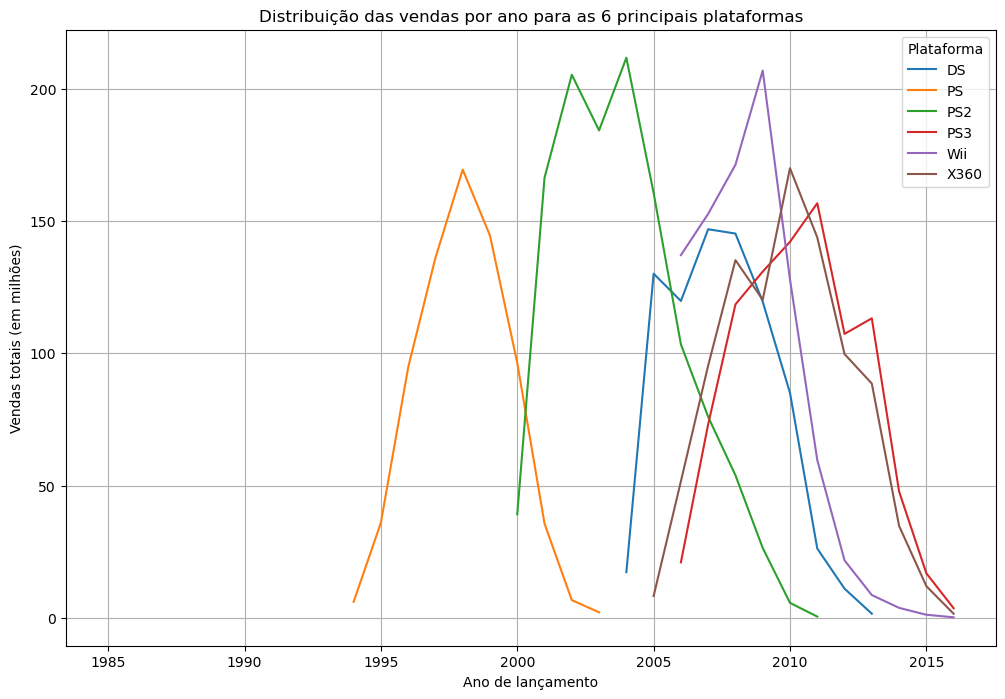

In [23]:
#criando gráfico de linhas para representar a distribuição com base em dados para cada ano

sales_by_year_top_platform.plot(kind='line', figsize=(12, 8))
plt.title('Distribuição das vendas por ano para as 6 principais plataformas')
plt.xlabel('Ano de lançamento')
plt.ylabel('Vendas totais (em milhões)')
plt.grid(True)
plt.legend(title='Plataforma')
plt.show()

As plataformas Wii e PS2 foram as que tiveram os maiores picos e também as que sofreram maior queda de vendas ao longo dos anos. As plataformas costumam ter cerca de 10 anos entre a ascensão e o declínio de suas vendas. 

In [24]:
#considerando os dados dos últimos 10 anos, de 2006 (quando os lançamentos por ano passaram de mil) a 2016

df_games_2006_2016 = df_games[(df_games['year_of_release'] >= 2006) & (df_games['year_of_release'] <= 2016)]

c:\Users\lelef\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


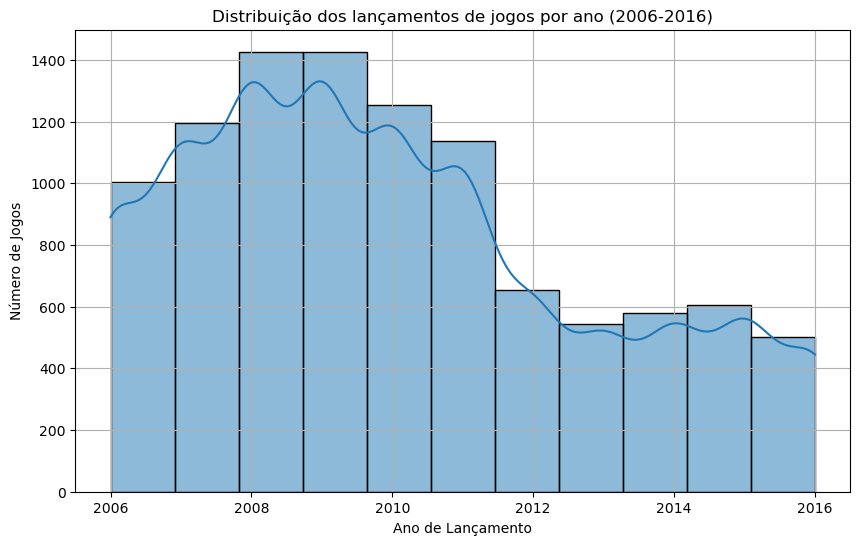

In [25]:
#plotando gráfico de distribuição dos lançamentos de jogos ao longo dos anos
plt.figure(figsize=(10, 6))
sns.histplot(data=df_games_2006_2016, x='year_of_release', bins=11, kde=True)
plt.title('Distribuição dos lançamentos de jogos por ano (2006-2016)')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Jogos')
plt.grid(True)
plt.show()

In [26]:
#filtrando os dados para incluir apenas os anos a partir de 2013
df_games_2013_2016 = df_games[df_games['year_of_release'] >= 2013]

In [27]:
#calculando as vendas totais de cada plataforma durante esse período
total_sales_per_platform_2013_2016 = df_games_2013_2016.groupby('platform')['total_sales'].sum()

print(total_sales_per_platform_2013_2016.sort_values(ascending=False))

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64


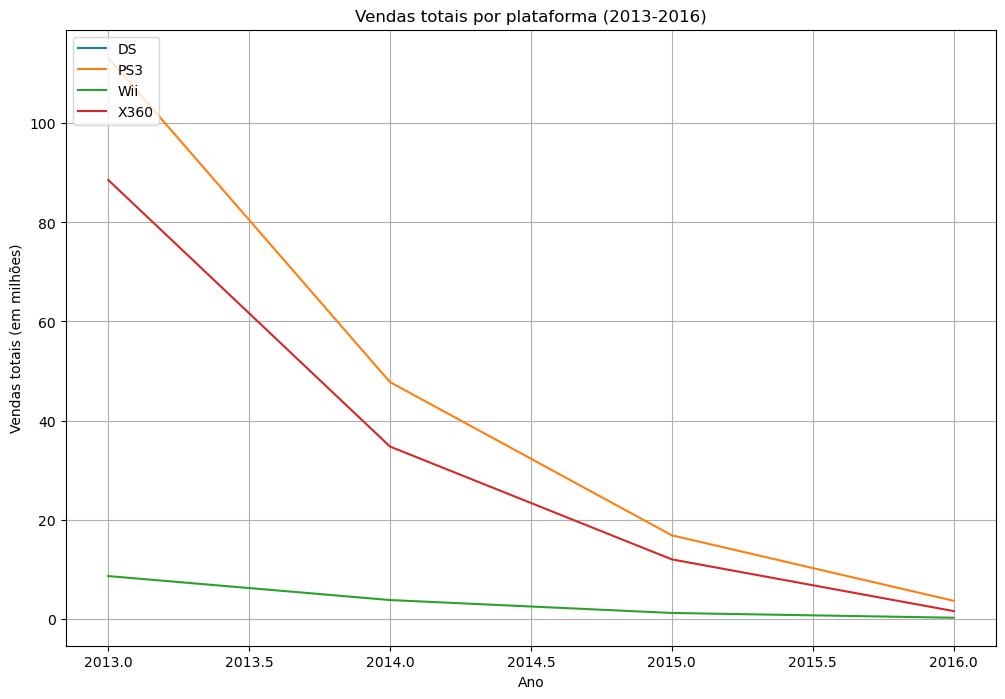

In [28]:
#plotando um gráfico para analisar as vendas das principais plataformas, de 2013 a 2016
top_platforms_2013_2016 = total_sales_per_platform_2013_2016.index

df_top_platforms_2013_2016 = df_games_2013_2016[df_games_2013_2016['platform'].isin(top_platforms)]

sales_by_year_top_platform_2013_2016 = df_top_platforms_2013_2016.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

plt.figure(figsize=(12, 8))
for platform in top_platforms_2013_2016:
    if platform in sales_by_year_top_platform_2013_2016.columns:
        plt.plot(sales_by_year_top_platform_2013_2016.index, sales_by_year_top_platform_2013_2016[platform], label=platform)

plt.title('Vendas totais por plataforma (2013-2016)')
plt.xlabel('Ano')
plt.ylabel('Vendas totais (em milhões)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

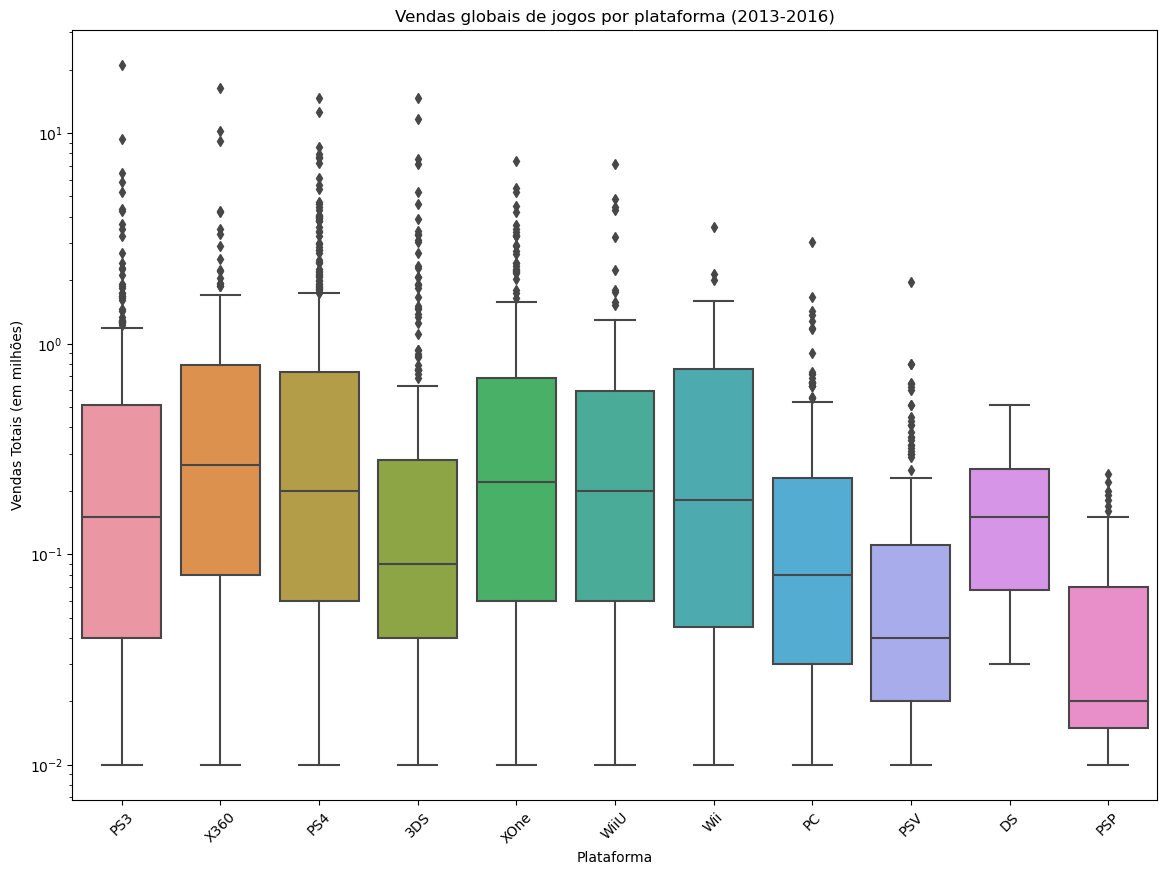

In [29]:
#construindo um diagrama de caixa para as vendas globais dos jogos, divididos por plataforma
#usei plt.yscale('log') para tentar facilitar a visualização dos boxplots

plt.figure(figsize=(14, 10))
sns.boxplot(data=df_games_2013_2016, x='platform', y='total_sales')
plt.title('Vendas globais de jogos por plataforma (2013-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais (em milhões)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

In [30]:
#agrupando os dados por plataforma e calculando a média das vendas

sales_per_platform_mean = df_games_2013_2016.groupby('platform')['total_sales'].mean()

print(sales_per_platform_mean)

platform
3DS     0.472772
DS      0.192500
PC      0.208624
PS3     0.525884
PS4     0.801378
PSP     0.052239
PSV     0.092151
Wii     0.593913
WiiU    0.562000
X360    0.735484
XOne    0.645020
Name: total_sales, dtype: float64


In [31]:
#calculando as medianas das vendas por plataforma

sales_per_platform_median = df_games_2013_2016.groupby('platform')['total_sales'].median()

print(sales_per_platform_median)

platform
3DS     0.090
DS      0.150
PC      0.080
PS3     0.150
PS4     0.200
PSP     0.020
PSV     0.040
Wii     0.180
WiiU    0.200
X360    0.265
XOne    0.220
Name: total_sales, dtype: float64


Não há tanta diferença nas vendas da maioria das plataformas, a que mais difere é 'DS'. Há bastante outliers na maioria das plataformas, podemos comprovar isso observando as diferenças entre as médias e medianas, indicando uma distribuição de vendas assimétrica e uma grande variabilidade nas vendas entre os jogos de uma mesma plataforma.

In [32]:
#analisando como as avaliações afetam as vendas da plataforma wii

df_wii = df_games[df_games['platform'] == 'Wii']

columns = ['user_score', 'critic_score', 'total_sales']
df_wii = df_wii[columns].dropna()

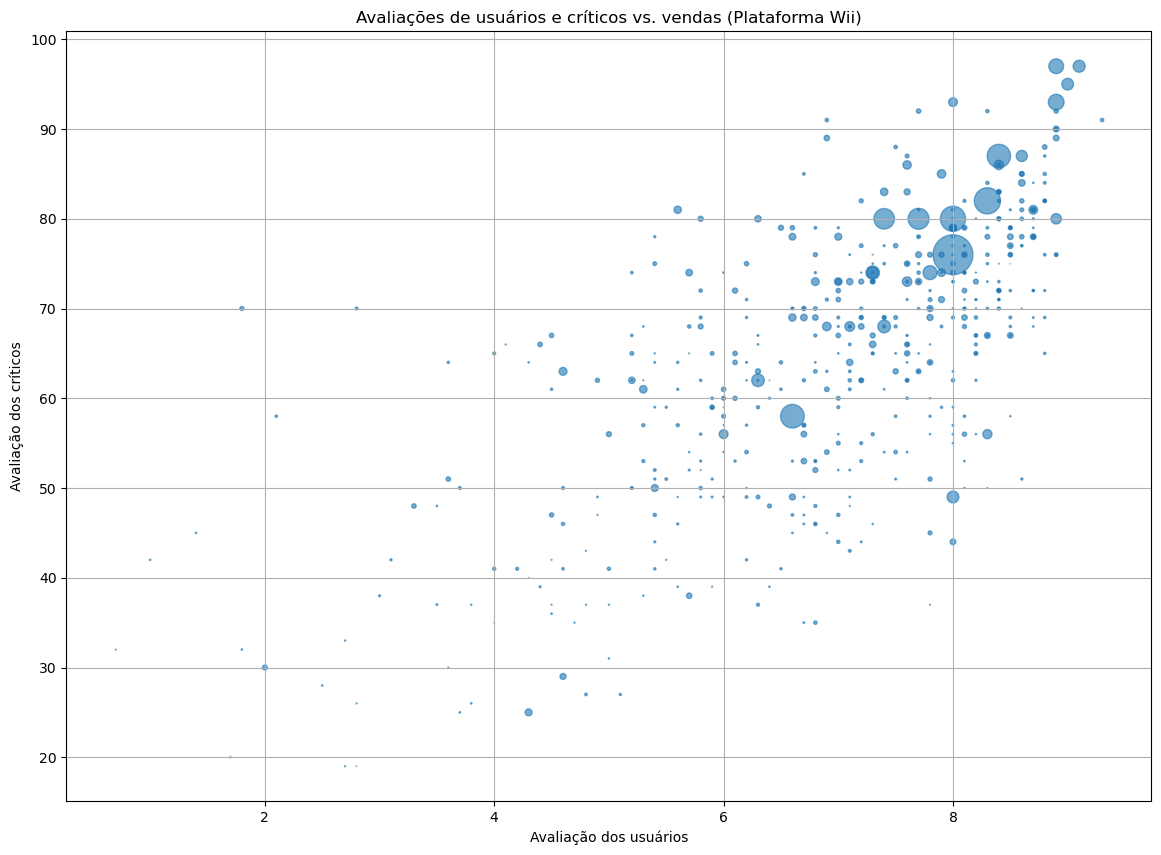

In [33]:
#construindo um gráfico de dispersão
#o tamanho dos pontos será proporcional às vendas totais de cada jogo

plt.figure(figsize=(14, 10))
plt.scatter(df_wii['user_score'], df_wii['critic_score'], s=df_wii['total_sales']*10, alpha=0.6)
plt.xlabel('Avaliação dos usuários')
plt.ylabel('Avaliação dos críticos')
plt.title('Avaliações de usuários e críticos vs. vendas (Plataforma Wii)')
plt.grid(True)
plt.show()

In [34]:
#calculando a correlação entre revisões e vendas

correlation = df_wii[['user_score', 'critic_score', 'total_sales']].corr()

print(correlation)

              user_score  critic_score  total_sales
user_score      1.000000      0.681846     0.110151
critic_score    0.681846      1.000000     0.169668
total_sales     0.110151      0.169668     1.000000


Considerando que os pontos estão espalhados no gráfico de dispersão e o cálculo da correlação, podemos observar que existe uma correlação positiva moderada entre as avaliações dos usuários e dos críticos profissionais. No entanto, a correlação entre as avaliações e as vendas totais é fraca, indicando que não há uma relação clara entre elas. Isso nos leva a crer que outros fatores podem influenciar significativamente nas vendas dos jogos.

In [35]:
#comparando as vendas dos mesmos jogos em outras plataformas

platforms_to_compare = ['X360', 'PS3', 'Wii']

common_games = df_games[(df_games['platform'].isin(platforms_to_compare)) &
                        (df_games.groupby('name')['platform'].transform('nunique') == len(platforms_to_compare))]

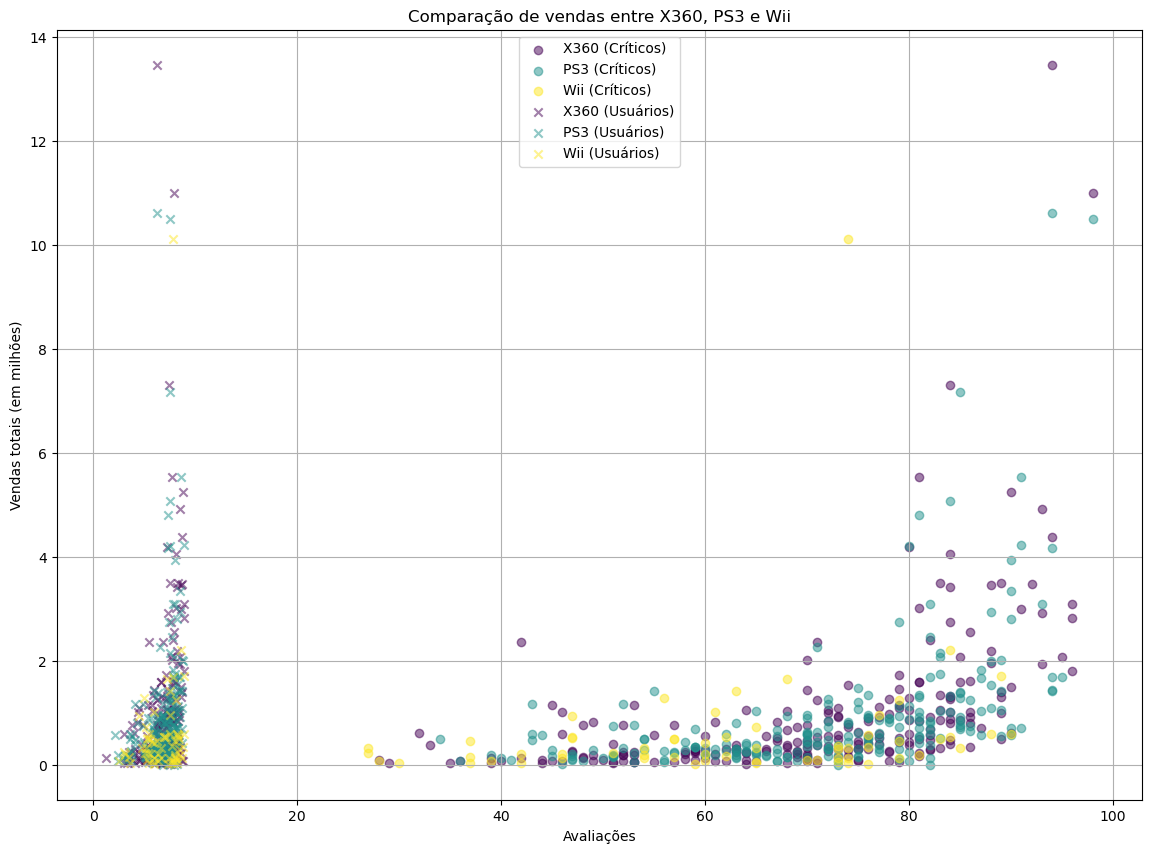

In [36]:
#construindo gráfico de dispersão para a comparação acima
#cmap='viridis' define a paleta de cores e c=i atribui uma cor diferente a cada plataforma com base no índice i

plt.figure(figsize=(14, 10))

colors = plt.cm.viridis(np.linspace(0, 1, len(platforms_to_compare)))

for i, platform in enumerate(platforms_to_compare):
    platform_data = common_games[common_games['platform'] == platform]
    plt.scatter(platform_data['critic_score'], platform_data['total_sales'], label=platform + ' (Críticos)', alpha=0.5, c=[colors[i]], marker='o')

for i, platform in enumerate(platforms_to_compare):
    platform_data = common_games[common_games['platform'] == platform]
    plt.scatter(platform_data['user_score'], platform_data['total_sales'], label=platform + ' (Usuários)', alpha=0.5, c=[colors[i]], marker='x')

plt.title('Comparação de vendas entre X360, PS3 e Wii')
plt.xlabel('Avaliações')
plt.ylabel('Vendas totais (em milhões)')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
#calculando a correlação, filtrando pelas plataformas escolhidas

df_platforms_to_compare = df_games_2013_2016[df_games_2013_2016['platform'].isin(platforms_to_compare)]

correlation_by_platforms = df_platforms_to_compare[['user_score', 'critic_score', 'total_sales']].corr()

print(correlation_by_platforms)

              user_score  critic_score  total_sales
user_score      1.000000      0.566082     0.001843
critic_score    0.566082      1.000000     0.339362
total_sales     0.001843      0.339362     1.000000


Esse resultado continua a mostrar uma correlação muito baixa entre as avaliações (especialmente dos usuários) e as vendas totais para essas plataformas.

In [38]:
#analisando a distribuição de jogos por gênero

games_genre_counts = df_games['genre'].value_counts()

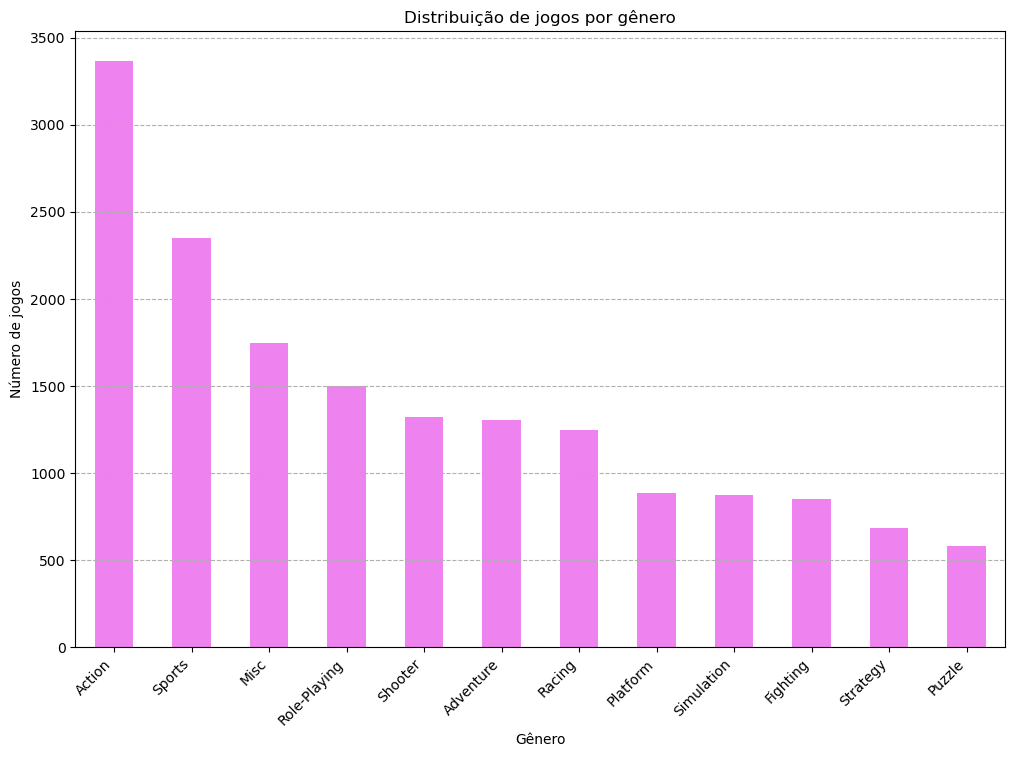

In [39]:
#plotando gráfico de barras para visualização

plt.figure(figsize=(12, 8))
games_genre_counts.plot(kind='bar', color='violet')
plt.title('Distribuição de jogos por gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de jogos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

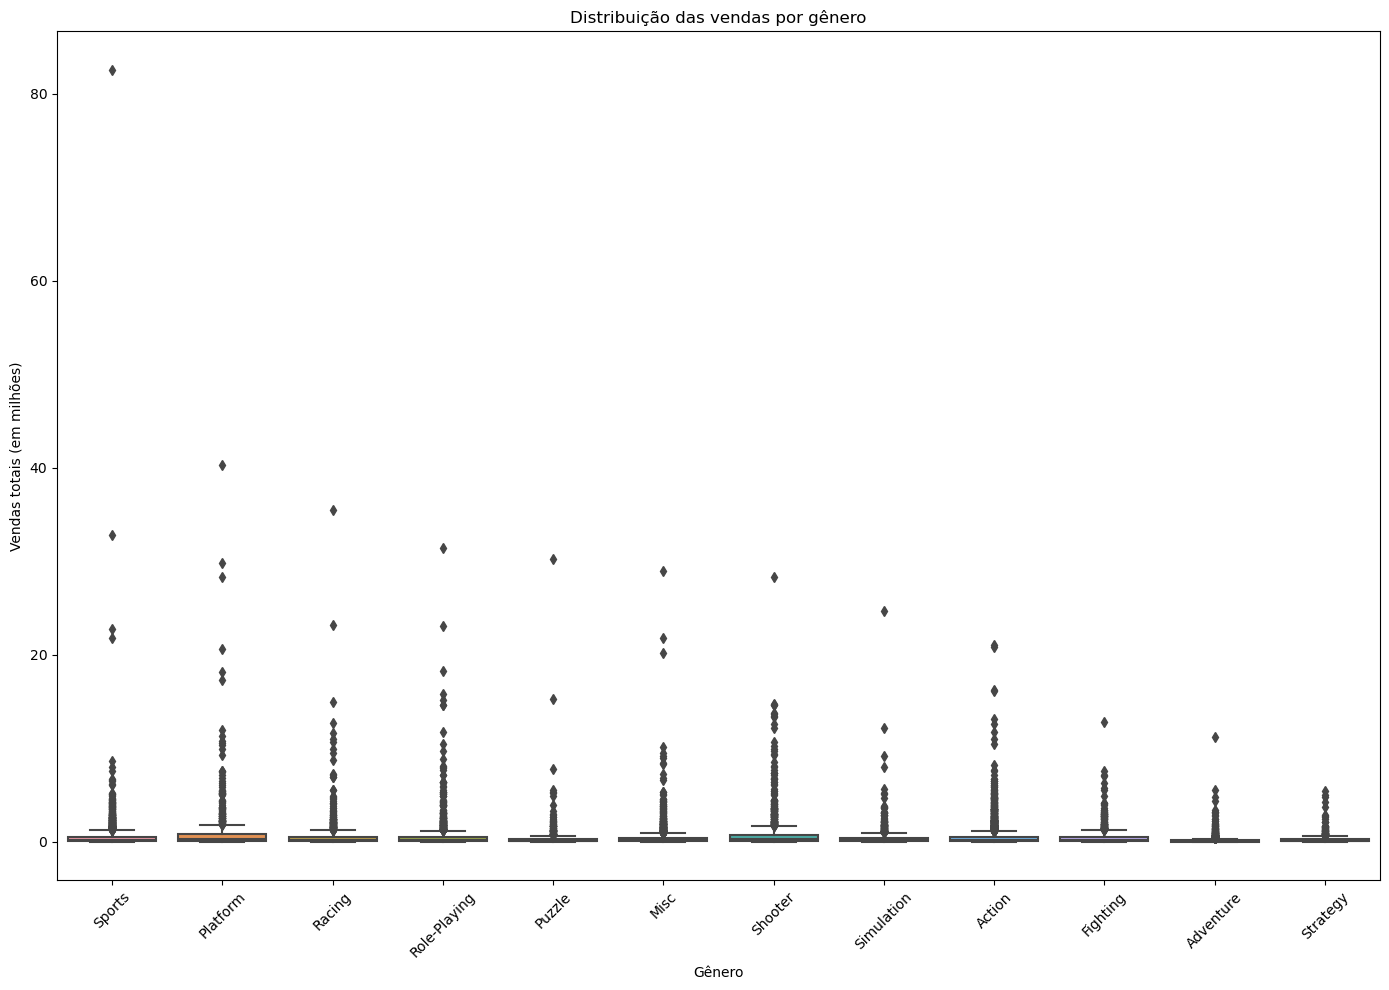

In [40]:
#construindo um boxplot para visualização da distribuição das vendas por gênero

plt.figure(figsize=(14, 10))
sns.boxplot(x='genre', y='total_sales', data=df_games)
plt.title('Distribuição das vendas por gênero')
plt.xlabel('Gênero')
plt.ylabel('Vendas totais (em milhões)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos notar que as caixas de 'Platform' e 'Shooter' são um pouco mais altas que dos demais gêneros, podendo indicar vendas superiores. Esses gêneros podem ser mais populares entre os jogadores, podem haver jogos de qualidade entre esses gêneros, que tiveram boa aceitação, e campanhas de marketing podem ter influenciado nesses resultados.

In [41]:
#calculando as medianas das vendas por gênero

sales_per_genre_median = df_games.groupby('genre')['total_sales'].median().sort_values(ascending=False)

print(sales_per_genre_median)

genre
Platform        0.27
Shooter         0.24
Sports          0.22
Fighting        0.21
Action          0.19
Racing          0.19
Role-Playing    0.18
Misc            0.16
Simulation      0.15
Puzzle          0.11
Strategy        0.10
Adventure       0.05
Name: total_sales, dtype: float64


Podemos observar que os gêneros 'Platform' e 'Shooter' têm as medianas mais altas, enquanto 'Adventure' tem a mediana mais baixa. Isso diz, de fato, que 'Platform' e 'Shooter' tendem a ter vendas mais altas, em comparação com outros gêneros.

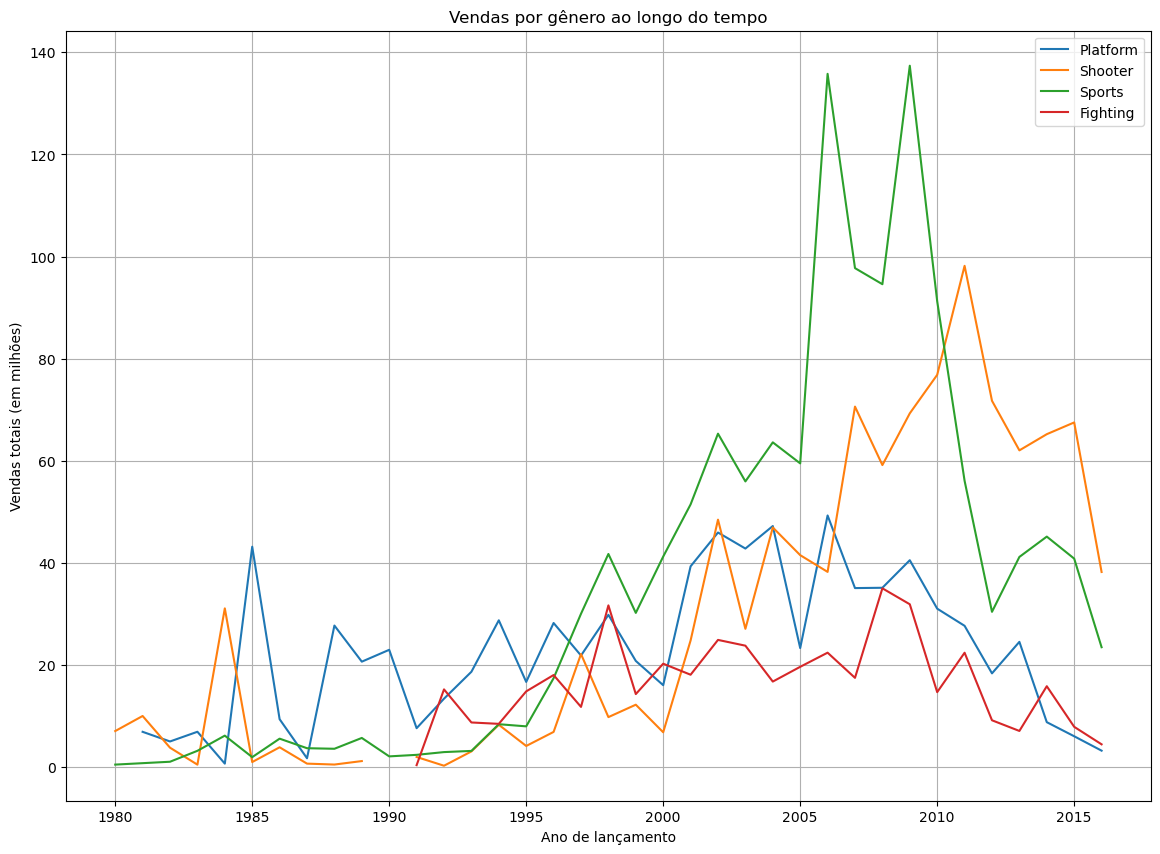

In [42]:
#analisando as vendas por gênero ao longo do tempo, filtrando por gêneros que tendem a ter as maiores vendas

genres_to_plot = ['Platform', 'Shooter', 'Sports', 'Fighting']

df_genre_sales = df_games[df_games['genre'].isin(genres_to_plot)]

sales_by_genre_year = df_genre_sales.groupby(['year_of_release', 'genre'])['total_sales'].sum().unstack()

plt.figure(figsize=(14, 10))
for genre in genres_to_plot:
    plt.plot(sales_by_genre_year.index, sales_by_genre_year[genre], label=genre)

plt.title('Vendas por gênero ao longo do tempo')
plt.xlabel('Ano de lançamento')
plt.ylabel('Vendas totais (em milhões)')
plt.legend()
plt.grid(True)
plt.show()

Os gêneros 'Sports' e 'Shooter' tiveram picos de vendas significativos entre 2006 e 2010/11, enquanto 'Platform' e 'Fighting' apresentaram vendas um pouco mais estáveis ao longo desse período, com variações, mas sem picos extremos. Isso pode indicar diferentes padrões de demanda e popularidade ao longo do tempo para cada gênero.

Os picos de vendas nos gêneros 'Sports' e 'Shooter', podem estar relacionados ao lançamento de jogos populares dentro dessas categorias, por exemplo. Já os gêneros 'Platform' e 'Fighting', podem ter mantido vendas mais consistentes ao longo dos anos devido à presença de títulos de sucesso contínuo.

In [43]:
#determinando as cinco plataformas principais para cada região

#agrupando os dados por plataforma e calculando as vendas totais em cada região
sales_by_platform_region = df_games.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

top_platforms_na = sales_by_platform_region.nlargest(5, 'na_sales')
top_platforms_eu = sales_by_platform_region.nlargest(5, 'eu_sales')
top_platforms_jp = sales_by_platform_region.nlargest(5, 'jp_sales')

print("América do Norte:")
print(top_platforms_na['na_sales'])

print("\nEuropa:")
print(top_platforms_eu['eu_sales'])

print("\nJapão:")
print(top_platforms_jp['jp_sales'])

América do Norte:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Europa:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Japão:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


In [45]:
#calculando as estatísticas descritivas para as cinco principais plataformas em cada região
stats_plataform_na = sales_by_platform_region.nlargest(5, 'na_sales')['na_sales'].describe()
stats_plataform_eu = sales_by_platform_region.nlargest(5, 'eu_sales')['eu_sales'].describe()
stats_plataform_jp = sales_by_platform_region.nlargest(5, 'jp_sales')['jp_sales'].describe()

print("América do Norte:")
print(stats_plataform_na)

print("\nEuropa:")
print(stats_plataform_eu)

print("\nJapão:")
print(stats_plataform_jp)

América do Norte:
count      5.000000
mean     491.820000
std      102.930115
min      382.400000
25%      393.490000
50%      496.900000
75%      583.840000
max      602.470000
Name: na_sales, dtype: float64

Europa:
count      5.0000
mean     283.2320
std       51.9655
min      213.6100
25%      262.2100
50%      270.7600
75%      330.2900
max      339.2900
Name: eu_sales, dtype: float64

Japão:
count      5.000000
mean     134.362000
std       28.300678
min      100.670000
25%      116.550000
50%      139.200000
75%      139.820000
max      175.570000
Name: jp_sales, dtype: float64


- Podemos perceber números de vendas mais expressivos na América do Norte, em comparação às outras regiões. 
- América do Norte e Europa têm 4 de suas 5 principais plataformas em comum.
- O Japão possui duas de suas plataformas principais que não estão presentes na lista de principais nem da Europa, nem da América do Norte.

In [46]:
#determinando os cinco principais gêneros para cada região

#agrupando os dados por gênero e somando as vendas em cada região
sales_by_genre_region = df_games.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

top_genres_na = sales_by_genre_region.nlargest(5, 'na_sales')
top_genres_eu = sales_by_genre_region.nlargest(5, 'eu_sales')
top_genres_jp = sales_by_genre_region.nlargest(5, 'jp_sales')

print("América do Norte:")
print(top_genres_na['na_sales'])

print("\nEuropa:")
print(top_genres_eu['eu_sales'])

print("\nJapão:")
print(top_genres_jp['jp_sales'])

América do Norte:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Europa:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Japão:
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


In [47]:
#calculando as estatísticas descritivas para os cinco principais gêneros em cada região
stats_genre_na = sales_by_genre_region.nlargest(5, 'na_sales')['na_sales'].describe()
stats_genre_eu = sales_by_genre_region.nlargest(5, 'eu_sales')['eu_sales'].describe()
stats_genre_jp = sales_by_genre_region.nlargest(5, 'jp_sales')['jp_sales'].describe()

print("América do Norte:")
print(stats_genre_na)

print("\nEuropa:")
print(stats_genre_eu)

print("\nJapão:")
print(stats_genre_jp)

América do Norte:
count      5.000000
mean     601.690000
std      191.073314
min      407.270000
25%      445.500000
50%      592.240000
75%      684.430000
max      879.010000
Name: na_sales, dtype: float64

Europa:
count      5.000000
mean     332.502000
std      123.063728
min      212.740000
25%      236.510000
50%      317.340000
75%      376.790000
max      519.130000
Name: eu_sales, dtype: float64

Japão:
count      5.000000
mean     178.264000
std      100.822861
min      108.110000
25%      130.830000
50%      135.540000
75%      161.430000
max      355.410000
Name: jp_sales, dtype: float64


- As três regiões possuem vários dos cinco principais gêneros em comum.
- Vemos claramente a diferença cultural, como, por exemplo, o fato do principal gênero no Japão ser 'Role-Playing', enquanto ele não fica nem no top 5 das outras regiões. Assim como 'Racing' estar entre os principais gêneros apenas da Europa.

In [48]:
#analisando se as classificações do ESRB afetam as vendas em regiões individuais

#agrupando os dados por classificação do ESRB e calculando as vendas totais em cada região
sales_by_rating_region = df_games.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

print("Vendas por Classificação do ESRB na América do Norte:")
print(sales_by_rating_region['na_sales'])

print("\nVendas por Classificação do ESRB na Europa:")
print(sales_by_rating_region['eu_sales'])

print("\nVendas por Classificação do ESRB no Japão:")
print(sales_by_rating_region['jp_sales'])

Vendas por Classificação do ESRB na América do Norte:
rating
AO                 1.26
E               1292.99
E10+             353.32
EC                 1.53
K-A                2.56
M                748.48
RP                 0.00
T                759.75
desconhecido    1240.68
Name: na_sales, dtype: float64

Vendas por Classificação do ESRB na Europa:
rating
AO                0.61
E               710.25
E10+            188.52
EC                0.11
K-A               0.27
M               483.97
RP                0.08
T               427.03
desconhecido    613.30
Name: eu_sales, dtype: float64

Vendas por Classificação do ESRB no Japão:
rating
AO                0.00
E               198.11
E10+             40.20
EC                0.00
K-A               1.46
M                64.24
RP                0.00
T               151.40
desconhecido    841.93
Name: jp_sales, dtype: float64


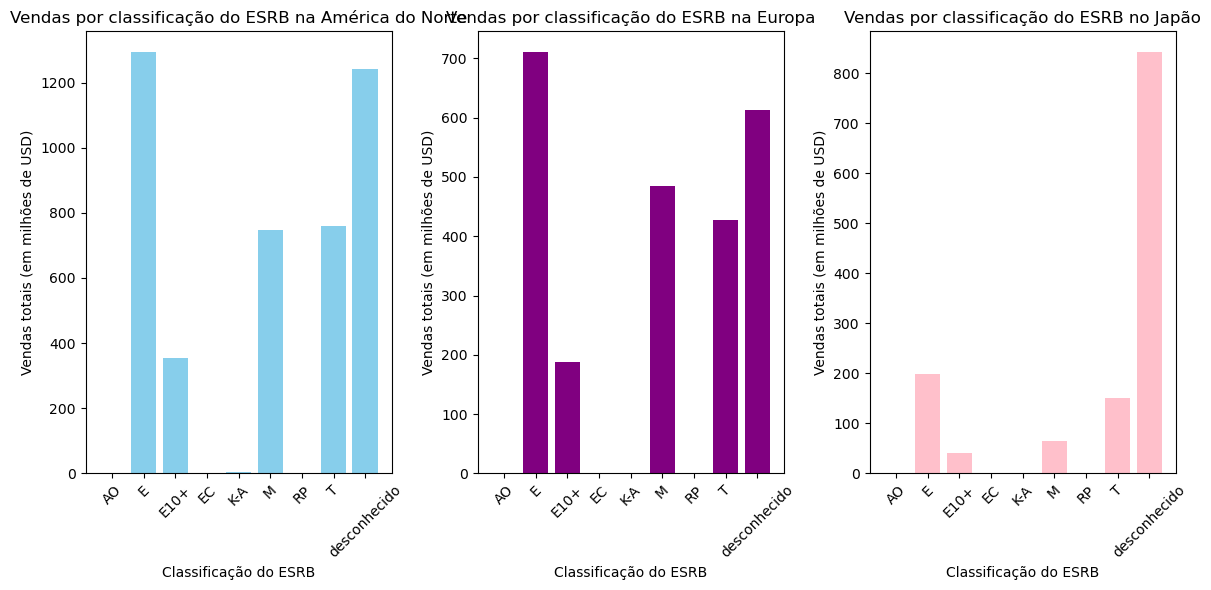

In [49]:
#plotando gráficos de barra, para visualização dos resultados
ratings = sales_by_rating_region.index
na_sales = sales_by_rating_region['na_sales']
eu_sales = sales_by_rating_region['eu_sales']
jp_sales = sales_by_rating_region['jp_sales']

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.bar(ratings, na_sales, color='skyblue')
plt.title('Vendas por classificação do ESRB na América do Norte')
plt.xlabel('Classificação do ESRB')
plt.ylabel('Vendas totais (em milhões de USD)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
plt.bar(ratings, eu_sales, color='purple')
plt.title('Vendas por classificação do ESRB na Europa')
plt.xlabel('Classificação do ESRB')
plt.ylabel('Vendas totais (em milhões de USD)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
plt.bar(ratings, jp_sales, color='pink')
plt.title('Vendas por classificação do ESRB no Japão')
plt.xlabel('Classificação do ESRB')
plt.ylabel('Vendas totais (em milhões de USD)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [50]:
sales_by_rating_region.head()

,na_sales,eu_sales,jp_sales
rating,,,
AO,1.26,0.61,0.00
E,1292.99,710.25,198.11
E10+,353.32,188.52,40.20
EC,1.53,0.11,0.00
K-A,2.56,0.27,1.46


In [52]:
#calculando a correlação entre vendas e scores por região

#filtrando o DataFrame
df_games_corr_by_region_score = df_games_2013_2016[['na_sales', 'eu_sales', 'jp_sales', 'critic_score', 'user_score']]

correlation_sales_critic_score_na = df_games_corr_by_region_score['na_sales'].corr(df_games_corr_by_region_score['critic_score'])
correlation_sales_user_score_na = df_games_corr_by_region_score['na_sales'].corr(df_games_corr_by_region_score['user_score'])

correlation_sales_critic_score_eu = df_games_corr_by_region_score['eu_sales'].corr(df_games_corr_by_region_score['critic_score'])
correlation_sales_user_score_eu = df_games_corr_by_region_score['eu_sales'].corr(df_games_corr_by_region_score['user_score'])

correlation_sales_critic_score_jp = df_games_corr_by_region_score['jp_sales'].corr(df_games_corr_by_region_score['critic_score'])
correlation_sales_user_score_jp = df_games_corr_by_region_score['jp_sales'].corr(df_games_corr_by_region_score['user_score'])

print("Correlação entre vendas na América do Norte e pontuações dos críticos:", correlation_sales_critic_score_na)
print("Correlação entre vendas na América do Norte e pontuações dos usuários:", correlation_sales_user_score_na)

print("Correlação entre vendas na Europa e pontuações dos críticos:", correlation_sales_critic_score_eu)
print("Correlação entre vendas na Europa e pontuações dos usuários:", correlation_sales_user_score_eu)

print("Correlação entre vendas no Japão e pontuações dos críticos:", correlation_sales_critic_score_jp)
print("Correlação entre vendas no Japão e pontuações dos usuários:", correlation_sales_user_score_jp)

Correlação entre vendas na América do Norte e pontuações dos críticos: 0.30112994431146956
Correlação entre vendas na América do Norte e pontuações dos usuários: -0.020010136415147983
Correlação entre vendas na Europa e pontuações dos críticos: 0.28078507833299726
Correlação entre vendas na Europa e pontuações dos usuários: -0.02703977307445157
Correlação entre vendas no Japão e pontuações dos críticos: 0.13414298238839212
Correlação entre vendas no Japão e pontuações dos usuários: 0.19402509941647914


In [53]:
#testes de hipótese

#Hipótese nula (H0): as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.
#Hipótese alternativa (H1): as classificações médias dos usuários das plataformas Xbox One e PC são diferentes.

#filtrando os dados e calculando as médias e variâncias
df_xbox_one = df_games[df_games['platform'] == 'XOne']
df_pc = df_games[df_games['platform'] == 'PC']

user_score_xbox_mean = df_xbox_one['user_score'].mean()
user_score_pc_mean = df_pc['user_score'].mean()

print("Média das classificações dos usuários para Xbox One:", user_score_xbox_mean)
print("Média das classificações dos usuários para PC:", user_score_pc_mean)

var_xbox = df_xbox_one['user_score'].var()
var_pc = df_pc['user_score'].var()

print("Variância das classificações dos usuários para Xbox One:", var_xbox)
print("Variância das classificações dos usuários para PC:", var_pc)

Média das classificações dos usuários para Xbox One: 6.521428571428572
Média das classificações dos usuários para PC: 7.062467532467533
Variância das classificações dos usuários para Xbox One: 1.9069968429360702
Variância das classificações dos usuários para PC: 2.3407871413372


In [54]:
alpha = 0.05

results = st.ttest_ind(df_xbox_one['user_score'].dropna(), df_pc['user_score'].dropna(), equal_var=False)

print('valor-p: ', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p:  4.935072360183574e-06
Rejeitamos a hipótese nula


A hipótese nula era de que as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas. Portanto, a hipótese alternativa foi de que essas médias são diferentes. Utilizei a função st.ttest_ind, uma vez que é usada para testar a hipótese de que as médias de duas populações estatísticas são iguais, com base nas amostras. Passei o parâmetro equal_var = False, baseado nos cálculos de variância.

Rejeitamos a hipótese nula, portanto, não podemos dizer que as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

In [55]:
#Hipótese nula (H0): as classificações médias dos usuários dos gêneros Action (ação) e Sports (esportes) são diferentes.
#Hipótese alternativa (H1): as classificações médias dos usuários dos gêneros Action (ação) e Sports (esportes) são as mesmas.

#filtrando os dados e calculando as médias e variâncias

df_action_sports = df_games[df_games['genre'].isin(['Action', 'Sports'])]

df_action = df_action_sports[df_action_sports['genre'] == 'Action']
df_sports = df_action_sports[df_action_sports['genre'] == 'Sports']

user_score_action_mean = df_action['user_score'].mean()
user_score_sports_mean = df_sports['user_score'].mean()

print("Média das classificações dos usuários para o gênero Action:", user_score_action_mean)
print("Média das classificações dos usuários para o gênero Sports:", user_score_sports_mean)

var_action = df_action['user_score'].var()
var_sports = df_sports['user_score'].var()

print("Variância das classificações dos usuários para o gênero Action:", var_action)
print("Variância das classificações dos usuários para o gênero Sports:", var_sports)

Média das classificações dos usuários para o gênero Action: 7.054043715846995
Média das classificações dos usuários para o gênero Sports: 6.96119673617407
Variância das classificações dos usuários para o gênero Action: 2.031746898033191
Variância das classificações dos usuários para o gênero Sports: 2.5965147189730073


In [56]:
alpha = 0.05

results = st.ttest_ind(df_action['user_score'].dropna(), df_sports['user_score'].dropna(), equal_var=False)

print('valor-p: ', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p:  0.11483818791498286
Não podemos rejeitar a hipótese nula


A hipótese nula era de que as classificações médias dos usuários dos gêneros Action (ação) e Sports (esportes) são diferentes. Portanto, a hipótese alternativa foi de que essas médias são as mesmas. Utilizei a função st.ttest_ind, uma vez que é usada para testar a hipótese de que as médias de duas populações estatísticas são iguais, com base nas amostras. Passei o parâmetro equal_var = False, baseado nos cálculos de variância.

Não podemos rejeitar a hipótese nula, portanto, as classificações médias dos usuários dos gêneros Action (ação) e Sports (esportes) não são iguais.

## Conclusões gerais

Por meio dos dados fornecidos, podemos ter noção do comportamento dos usuários dos jogos e a diferença deles em cada região (América do Norte, Europa e Japão). Analisamos quais são as plataformas e jogos mais consumidos e como as classificações interferem nesse consumo. Pudemos perceber que essas classificações não têm um papel de influência muito significativo e que outras variáveis podem interferir nas vendas, como público fiel, tendências globais, lançamentos e campanhas específicas. Ao observarmos diferenças entre as regiões, notamos a importância de considerar o público local ao planejar um lançamento.